# Assumptions

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [23]:
df = pd.read_csv('data.csv')

In [24]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [50]:
X = df.iloc[:,:3].values
y = df.iloc[:,-1].values

In [52]:
X.shape

(200, 3)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [77]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
y_pred = model.predict(X_test)

## Before we apply linear regression we have to check if all the assumptions of linear regression are satisfied for this dataset.

# 1. There should be linear relationship between the input and the output.

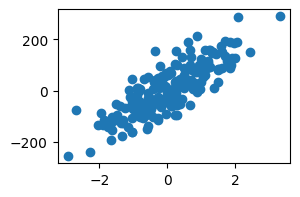

In [25]:
plt.figure(figsize=(3,2))
plt.scatter(df.feature1,df.target)

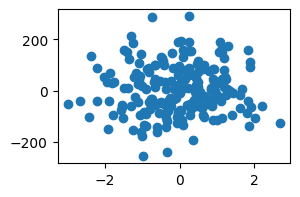

In [26]:
plt.figure(figsize=(3,2))
plt.scatter(df.feature2,df.target)

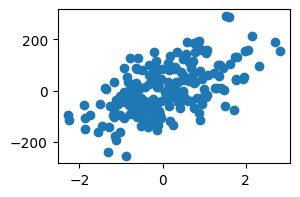

In [27]:
plt.figure(figsize=(3,2))
plt.scatter(df.feature3,df.target)

We can say that almost all the inputs are in linear relationship with the output.

# 2.No Multicollinearity.

This means the independent variables should not be dependent on each other.
There should be no correlation in between the features.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = []

In [55]:
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X,i))

In [56]:
vif

[np.float64(1.0025453899539654),
 np.float64(1.0034097323047833),
 np.float64(1.0059371572705345)]

In [71]:
vif_df = pd.DataFrame({'VIF':vif},index = df.columns[:3]).T
vif_df

,feature1,feature2,feature3
VIF,1.002545,1.00341,1.005937


OR

<Axes: >

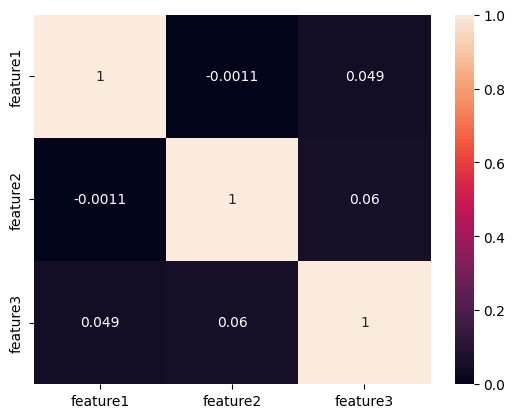

In [84]:
sn.heatmap(df.iloc[:,0:3].corr(),annot=True)

All the VIF values for the features are near to 1 . Therefore there is no multicollinearity between the features.

Also the correlation matrix is showing that the features are not correlated to each other.

# 3.Normality of errors.

The errors should have a normal distribution when plotted.

In [80]:
residuals = y_test - y_pred

In [82]:
residuals[:3]

array([ 9.30076357,  7.40414596, 40.23801686])

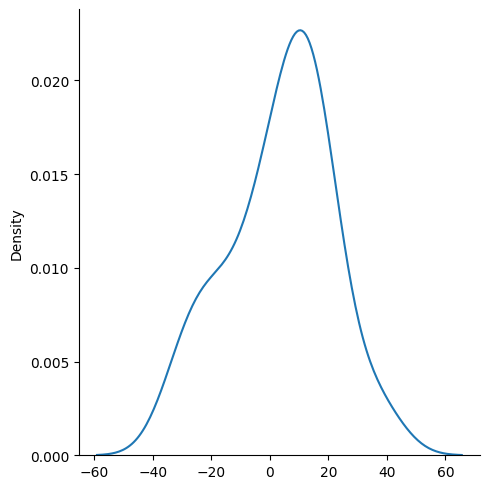

In [85]:
sn.displot(residuals, kind = 'kde')

This is almost a normal distribution.

# 4. Homoscedasticity

The errors when plotted against y_pred , should be scattered evenly/uniformly.

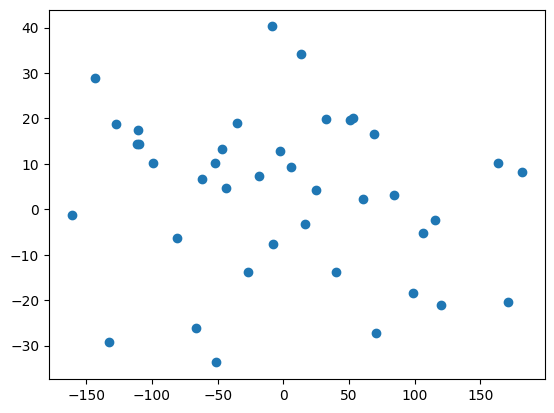

In [86]:
plt.scatter(y_pred,residuals)

The errors are evenly spreaded.

# 5.  No Autocorrelation of Errors.

The errors when plotted should not form any pattern.

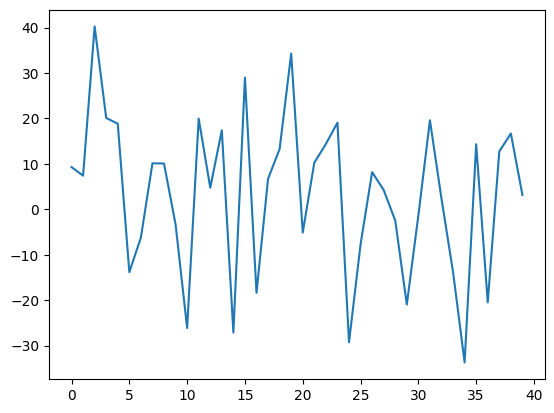

In [87]:
plt.plot(residuals)

There is no perticular pattern found. Means there is a negative autocorrelation of residuals.